# **Introduction to Convulational Neural Network and Computer Vision with TensorFlow**

Computer Vission is the practice of writing algorithm which can discover pattern in visual data .

**Eg**:- as the camera of a self-driving car recognizing the car in front



## Get the Data
 
 The images we'are working with are from the Food101 dataset(101 different classes of food) ; https://www.kaggle.com/datasets/dansbecker/food-101
 
 However we've modified for 2 classes of foof which is ( Pizza and steak dataset)  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip


In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# unzip the folder
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()


## **Inspect the data (become one with it)**

* A very crucial steps at the begining of any machine learning project is becoming one with the data.

* And for a computer vision project---this usually means visualizing many samples of yur data

In [ ]:
!ls pizza_steak

In [ ]:
!ls pizza_steak/train

In [ ]:
!ls pizza_steak/train/steak

In [ ]:
!ls pizza_steak/train/pizza

In [ ]:
import os
# Walk through pizza_steak directory

for dirpath , dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} image in '{dirpath}'.")

In [ ]:
!ls -la pizza_steak

In [ ]:
# Another way to find out how many images are in a file 

num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_test = len(os.listdir("pizza_steak/test/steak"))

In [ ]:
num_steak_images_train , num_steak_images_test

**To visualize our images , first let's get the class names programmatically**

In [ ]:
# Ge the class name 
import pathlib
import numpy as np 

data_dir =  pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))

print(class_names)


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir , target_class):
  target_folder = target_dir+target_class

  # get random images path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)
  
  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape :{img.shape}")
  return img

In [ ]:
img = view_random_image("pizza_steak/train/" , "steak")

In [ ]:
img[0].shape

In [ ]:
import tensorflow as tf

tf.constant(img)

In [ ]:
# Get all the pixel value between 0 and 1
img/255.

## **End-to-end example**

**Let's build a convolutional neural network to find pattern in our images,more specifically we a need way to:-**

* Load our Image 
* preprocessing our images.
* Build a CNN to our images.
* Compile our CNN.
* Fit the CNN to our taining model.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the random seeds
 
tf.random.set_seed(42)

#preprocessing data (get all of the pixel value between 0 $ 1)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#setup path to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# import data from the directories and turn into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)


valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

#Build CNN model
model_1 = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(filters=10,
                                 kernel_size=10,
                                 activation="relu",
                                 input_shape=(224,224,3)),

          tf.keras.layers.Conv2D(10,3,activation="relu"),

          tf.keras.layers.MaxPool2D(pool_size=2,
                                    padding="valid"),
                                     
          tf.keras.layers.Conv2D(10,3,activation="relu"),
          tf.keras.layers.Conv2D(10,3,activation="relu"),

          tf.keras.layers.MaxPool2D(2),

          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(1,activation="sigmoid")                                
])


# compile our CNN model_1
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

 # fit the CNN model_1
history_1 = model_1.fit(train_data,
                         epochs=5,
                         steps_per_epoch=len(train_data),
                         validation_data=valid_data,
                         validation_steps=len(valid_data))

In [ ]:
len(train_data),len(valid_data)

In [ ]:
# Epoch 1/5
# 47/47 [==============================] - 221s 5s/step - loss: 0.6269 - accuracy: 0.6527 - val_loss: 0.4532 - val_accuracy: 0.8020
# Epoch 2/5
# 47/47 [==============================] - 216s 5s/step - loss: 0.4724 - accuracy: 0.7847 - val_loss: 0.3857 - val_accuracy: 0.8340
# Epoch 3/5
# 47/47 [==============================] - 216s 5s/step - loss: 0.4425 - accuracy: 0.7973 - val_loss: 0.4159 - val_accuracy: 0.8020
# Epoch 4/5
# 47/47 [==============================] - 218s 5s/step - loss: 0.4562 - accuracy: 0.7987 - val_loss: 0.5024 - val_accuracy: 0.7500
# Epoch 5/5
# 47/47 [==============================] - 217s 5s/step - loss: 0.4432 - accuracy: 0.8053 - val_loss: 0.3740 - val_accuracy: 0.8540



In [ ]:
model_1.summary()

# Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image data .

The model we,re building is from the [TensorFlow playground]

In [ ]:
 #set random set
 tf.random.set_seed(42)

 # create the model_2 to replicate the TensorFlow Playground model.

 model_2 =  tf.keras.models.Sequential([
                                        
         tf.keras.layers.Flatten(input_shape=(224,224,3)),
         tf.keras.layers.Dense(4,activation="relu"),
         tf.keras.layers.Dense(4,activation="relu"),
         tf.keras.layers.Dense(1,activation="sigmoid")
         
     ])
 
 # Compile the model_2
 model_2.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
 
# Fit the model_2

history_2 = model_2.fit(train_data,
                         epochs=5,
                         steps_per_epoch=len(train_data),
                         validation_data=valid_data,
                         validation_steps=len(valid_data))

In [ ]:
model_2.summary()

**Despite having20x more parameters than the CNN (model_1),model_2performs** **terribly** 

**So,let's try to improve model_2**

In [ ]:
 #set random set
 tf.random.set_seed(42)

 # create the model_3 to replicate the TensorFlow Playground model_2.

 model_3 =  tf.keras.models.Sequential([
                                        
         tf.keras.layers.Flatten(input_shape=(224,224,3)),
         tf.keras.layers.Dense(100,activation="relu"),
         tf.keras.layers.Dense(100,activation="relu"),
         tf.keras.layers.Dense(1,activation="sigmoid")
         
     ])
 
 # Compile the model_3
 model_3.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
 
 # Fit the model_2
history_3 = model_3.fit(train_data,
                         epochs=5,
                         steps_per_epoch=len(train_data),
                         validation_data=valid_data,
                         validation_steps=len(valid_data))

**Note:-** You can think of trainable parameters as **patterns a model can learn from data** .Intuitively,you might think more is better and in lots of casesit is.
but in this case the difference here is two different style of model we're using .

we here a series of Dense layers has number of differernt trainable parameters connected to each other and hence a higher number of possible learneable pattern
**a convolutional neural network seeks to short out the learn most important patterns in an images .**

So even though these are less learnable parameters in our convolutional neural network ,these are often more helpful in **dechiphering between different features in images**

# **Binary Classifiction :Let's break it down**

 1.Become one with Data (Visulaize,visualize,visulaize..........)

 2.Preprocess the Data (prepared it for our model,the main step here was scalling/normalizing.

 3.Create the model(start with the baseline).

 4.Fit the model.

 5.Evaluate the model.

 6.Adjust the different parameters and improve the model(try to beat out baseline.

 7.Repeat until satisfied(experiment,experiment,eexperiment).

##**1.Become one with Data**

In [ ]:
plt.figure(figsize=(10,7))

plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/",'steak')

plt.subplot(1,2,2)
pizzza_img = view_random_image("pizza_steak/train/",'pizza')

##**2.Preprocess the Data**

In [ ]:
# Define he Directoy of the dataset
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [ ]:
 from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


In [ ]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

In [ ]:
images,labels=train_data.next()

len(images) ,len(labels) , len(train_data)

In [ ]:
labels

In [ ]:
images[7].shape , len(images[7]) 

In [ ]:
images[:4].shape

##**3.Create the model(start with the baseline).**

A baseline is a relatively  simple model or existing model that setup when begining a machine leaning experiment and then as you keep experiment we, try to beat them baseline.


In [ ]:
# make the creating model a litle easier

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential

In [ ]:
# Create a model from the baseline.
model_4 = Sequential([
      Conv2D(filters=10,
            kernel_size=3,
            strides=1,
            padding="valid",
            activation="relu",
            input_shape=(224,224,3)),
      Conv2D(10,3,activation="relu"),
      Conv2D(10,3,activation="relu"),
      Flatten(),
      Dense(1,"sigmoid")
     
])

In [ ]:
# compile thge model

model_4.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [ ]:
model_4.summary()

##**4.Fit the model.**

In [ ]:
# check the length of training Data

len(train_data),len(test_data)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

## **Looks Difference the Evaluation on 4 different model at test_data set**

In [ ]:
model_1.evaluate(test_data)

In [ ]:
model_2.evaluate(test_data)

In [ ]:
model_3.evaluate(test_data)

In [ ]:
model_4.evaluate(test_data)

##**5.Evaluate the model.**
It's look like our model is learning something 
So, lets evaluate

In [ ]:
import pandas as pd

pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [ ]:
# plot the validation and training curve seperately

pd.DataFrame(history_4.history)

In [ ]:
def plot_loss_curve(history):
  """
  Return seperate loss curves fr training and validation metrics.
  """
  loss= history.history["loss"]
  val_loss= history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # plot loss
  plt.figure(figsize=(8,5))
  plt.plot(epochs,loss,label="training loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()
  # plot accuracy
  plt.figure(figsize=(8,5))
  plt.plot(epochs,accuracy,label="training accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

**Note:-** When a model **validation loss starts to increase**,It's likely that **the model is overfitting** the training dataset.

This means i's learning the pattern in the training dataset to well and thus the model's ability to generalize to unseen data will be diminished.


In [ ]:
# checked the loss and accuracy of model_4

plot_loss_curve(history_4)

##**6.Adjust the different parameters and improve the model.**
**Fitting machine learning model comes in 3steps:**
  * Create baseline.
  * Beat the baseline by overfitting a larger model.
  * Reduce overfitting.

**Way to induce Overfiting:**
  * Increase the number of Conv layers.
  * Increase the number of Conv filters.
  * Add another dense layer to the output of our flattened layers.

**Reduce Overfitting :-**
  * Add data augmentation.
  * Add regularization layers(such as MaxPool2D).
  * Add more data......@


In [ ]:
# create model from the new basline

model_5 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [ ]:
# compile thge model

model_5.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

In [ ]:
model_5.evaluate(train_data)

In [ ]:
# summary of model_5

model_5.summary()

In [ ]:
# summary of model_4

model_4.summary()

In [ ]:
# checked the loss and accuracy of model_5

plot_loss_curve(history_5)

##**7.Open our bag of tricks and Finding data augmentation.**

  **Data Augmentation**

In [ ]:
# create ImageDataGenerator training instance with data augmentation.

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

# Create ImagaeDataGenerator without Data augmentation
train_data = ImageDataGenerator(1/255.)

# Create ImagaeDataGenerator without Data augmentation for test dataset
test_data = ImageDataGenerator(1/255.)

**Question:** *What is data augmentation?*

**---->** Data augmentation is the process of altering our  training the data,leading it to have more diversity and in turn allowing our models to learn moe generlizable(hopefully) patterns.
Allright might means **adjusting the rotation of images ,flipping it,cropping it, or something similar.**

**Let's write some code to visualize data augmentation.**

In [ ]:
# Import data and augmented it from the traning diectory
print("Augmented Training Data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False)
# create non=augmented training data batches
print("Non-augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

IMG_SIZE=(224,224)
# create non-augmented test data batches 
print("Non-augmented test data :")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary",
                                             )




In [ ]:
# get sample of data batches
images,labels = train_data.next()
images_augmented,labels_augmented = train_data_augmented.next()

In [ ]:
# show Original image and augmented images
import random
random_number = random.randint(0,31)
print(f"showing image number:{random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()

plt.imshow(images_augmented[random_number])
plt.title(f"Augmented image")
plt.axis(False)
plt.figure()

In [ ]:
len(train_data)

In [ ]:
len(images_augmented)

In [ ]:
len(images)

In [ ]:
len(test_data)

In [ ]:
1500/32

In [ ]:
# create model (same as model_5 but training data would be the Augmented sample)

model_6 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

# compile thge model

model_6.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


In [ ]:
model_6.summary()

In [ ]:
model_5.evaluate(train_data)

In [ ]:
model_6.evaluate(train_data_augmented)

In [ ]:
plot_loss_curve(history_6)

***Lets Shuffle our augmented training data and train another model(the same as before)om it and see what happen***

In [ ]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224,224),
                                                                            batch_size=32,
                                                                            class_mode="binary",
                                                                            shuffle=True)

In [ ]:
# create model (same as model_6 and model_5 but training data would be the shuffled Augmented sample)

model_7 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

# compile thge model

model_7.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


In [ ]:
model_7.summary()

In [ ]:
model_7.evaluate(train_data_augmented_shuffled)

In [ ]:
plot_loss_curve(history_7)

**Note:-** When shuffling training data ,the model gets exposed to all different kinds of data during training,thus enabling it to learn features across wide array of images(i.e in case our pizza and steak at the same time instead of just pizza then steak.

##**7.Repeat until satisfied(experiment,experiment,eexperiment).**
Since we've allready beaten our baseline model ,there are few things we could ty to continue to improve our model:-

 * Increase the number of layers(eg: add 'Conv2d/MaxPool2D layers).
 * Increase he number of filters in each convolutional layers(eg:from 10 to 32 or even 64).
 * Train for longer(moe epochs).
 * Get more data(give the model more opportunity to learn).
 * Use tranfer learning  to leverage what another image model has learn and adjust it for our own use case,


**Practice:-Let's Recreate the model on the CNN explainer website(same as model_1)** **and see how it perfoms on augmented shuffling training data.**

# **Making Prediction with our trained model on our own custom data**

In [ ]:
# classes  we're working with
print(class_names)

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 

In [ ]:
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);


In [ ]:
steak.shape

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img


In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak


In [ ]:
# Make a prediction on our custom image (spoiler: this won't work)
model_7.predict(steak)


ValueError: ignored

**There's one more problem...**

Although our image is in the same shape as the images our model has been trained on, **we're still missing a dimension.**

Remember how our model was trained in batches?

Well, **the batch size becomes the first dimension**.

So in reality, **our model was trained on data in the shape of (batch_size, 224, 224, 3).**

**We can fix this by adding an extra to our custom image tensor using tf.expand_dims**

In [77]:
# Add an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")
steak


Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [78]:


# Make a prediction on custom image tensor
pred = model_7.predict(steak)
pred



array([[0.9501797]], dtype=float32)

In [79]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [80]:
class_names[1] , class_names[0]

('steak', 'pizza')

In [81]:


# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class



'steak'

In [82]:
# def pred_and_plot(model, filename, class_names):
#   """
#   Imports an image located at filename, makes a prediction on it with
#   a trained model and plots the image with the predicted class as the title.
#   """
#   # Import the target image and preprocess it
#   img = load_and_prep_image(filename)

#   # Make a prediction
#   pred = model.predict(tf.expand_dims(img, axis=0))

#   # Get the predicted class
#   pred_class = class_names[int(tf.round(pred)[0][0])]

#   # Plot the image and predicted class
#   plt.imshow(img)
#   plt.title(f"Prediction: {pred_class}")
#   plt.axis(False);

# Re-configure pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  #Add in logic for multi-class
  if len(pred[0]) > 1:
    pred_class  = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0][0]))]


  # Get the predicted class
 # pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);


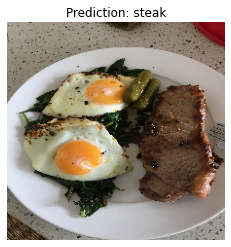

In [83]:
# test our model on our custom data
pred_and_plot(model_3,"03-steak.jpeg",class_names)

In [84]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 


--2022-07-18 13:12:01--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.03s   

2022-07-18 13:12:01 (78.4 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



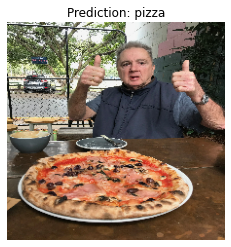

In [85]:
pred_and_plot(model_7, "03-pizza-dad.jpeg", class_names)

# **Multi-class Classification**
🛠 Practice: Before scrolling down, how do you think we might change our model to work with 10 classes of the same kind of images? Assume the data is in the same style as our two class problem.

How about we go through those steps again, except this time, we'll work with 10 different types of food.

      1.Become one with the data (visualize, visualize, visualize...)

      2.Preprocess the data (prepare it for a model)

      3.Create a model (start with a baseline)

      4.Fit the model

      5.Evaluate the model

      6.Adjust different parameters and improve model (try to beat your baseline)
      
      7.Repeat until satisfied



##**1. Become one with the data**

In [86]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 




--2022-07-18 13:12:02--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.128, 74.125.197.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   252MB/s    in 2.0s    

2022-07-18 13:12:04 (252 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [87]:
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

**let's check out all of the different directories and** **sub-directories in the 10_food_classes file.**


In [88]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 

**setup the training and test directory paths.**

In [89]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [90]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

['1878636.jpg']
Image shape :(512, 383, 3)


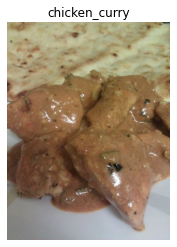

In [91]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))


## **2. Preprocess the data (prepare it for a model).**

In [92]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## **3. Create a model (start with a baseline)**
 * Changing the output layer to use have 10 ouput neurons (the same number as the number of classes we have).
 *Changing the output layer to use 'softmax' activation instead of 'sigmoid' activation.
 *Changing the loss function to be 'categorical_crossentropy' instead of 'binary_crossentropy'.


In [93]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') 
])

# Compile the model
model_8.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


##**4. Fit a model.**

Now we've got a model suited for working with multiple classes, let's fit it to our data.


In [94]:
# Fit the model
history_8 = model_8.fit(train_data, # now 10 different classes 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 47s 196ms/step - loss: 2.1481 - accuracy: 0.2128 - val_loss: 1.9772 - val_accuracy: 0.2940
Epoch 2/5
235/235 [==============================] - 45s 191ms/step - loss: 1.8476 - accuracy: 0.3597 - val_loss: 1.9369 - val_accuracy: 0.3176
Epoch 3/5
235/235 [==============================] - 45s 191ms/step - loss: 1.4142 - accuracy: 0.5320 - val_loss: 2.0291 - val_accuracy: 0.3304
Epoch 4/5
235/235 [==============================] - 46s 194ms/step - loss: 0.7410 - accuracy: 0.7672 - val_loss: 2.6659 - val_accuracy: 0.2976
Epoch 5/5
235/235 [==============================] - 45s 191ms/step - loss: 0.2616 - accuracy: 0.9237 - val_loss: 3.9072 - val_accuracy: 0.2876


## **Evaluate the model**

In [95]:
# evaluate on test data 

model_8.evaluate(test_data)

79/79 [==============================] - 11s 137ms/step - loss: 3.9072 - accuracy: 0.2876


[3.907221794128418, 0.28760001063346863]

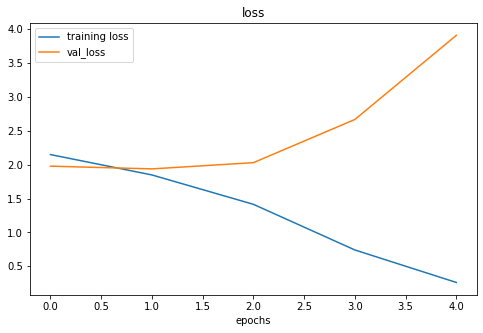

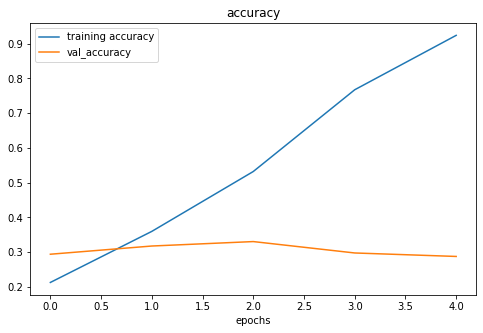

In [96]:
# check out the model's loss curves om the 10 classes

plot_loss_curve(history_8)

**Note:-** There is quite the gap between the training and validation loss curves.

What does this tell us?

It seems our model is **overfitting** the training set quite badly. 

 it's getting great results on the training data but fails to generalize well to unseen data and **performs poorly on the test data.**


##**6.Adjust different parameters and improve model (try to beat your baseline)**
So our next steps will be to try and prevent our model overfitting. A couple of ways to prevent overfitting include:

**Get more data -** Having more data gives the model more opportunities to learn patterns, patterns which may be more generalizable to new examples.

**Simplify model -** If the current model is already overfitting the training data, it may be too complicated of a model.  One way to simplify a model is to reduce the number of layers it uses or to reduce the number of hidden units in each layer.

**Use data augmentation -** Data augmentation manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data.

**Use transfer learning -** Transfer learning involves leverages the patterns another model has learned on same use those pattern on your own dataset.

In [97]:
#we'll remove two of the convolutional layers, taking the total number of convolutional layers from four to two.
model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_9.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])


history_9 = model_9.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))



Epoch 1/5
235/235 [==============================] - 44s 187ms/step - loss: 2.1408 - accuracy: 0.2321 - val_loss: 1.9127 - val_accuracy: 0.3396
Epoch 2/5
235/235 [==============================] - 43s 183ms/step - loss: 1.7954 - accuracy: 0.3836 - val_loss: 1.8715 - val_accuracy: 0.3428
Epoch 3/5
235/235 [==============================] - 43s 182ms/step - loss: 1.4883 - accuracy: 0.5073 - val_loss: 1.9453 - val_accuracy: 0.3292
Epoch 4/5
235/235 [==============================] - 43s 184ms/step - loss: 1.0917 - accuracy: 0.6463 - val_loss: 2.1214 - val_accuracy: 0.3292
Epoch 5/5
235/235 [==============================] - 43s 182ms/step - loss: 0.6735 - accuracy: 0.7988 - val_loss: 2.4370 - val_accuracy: 0.3148


In [ ]:
# check out the model's loss curves om the 10 classes

plot_loss_curve(history_9)

**How about we try data augmentation?**

##**Trying to reduce Overfitting with data augmentation.**

**Let's try to improve our model result's by using augmented training data.**

**Ideally we want:-**
  * Reduce the overfitting (get train and validation loss curves closer).
  * Improve validation accuracy.

In [ ]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

In [ ]:
#Clone the model (use the same architecture)

model_10 = tf.keras.models.clone_model(model_8)

# Compile the cloned model (same setup as used for model_10)
model_10.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
# Fit the model
history_10 = model_10.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))


Epoch 1/5
235/235 [==============================] - 112s 475ms/step - loss: 2.2881 - accuracy: 0.1299 - val_loss: 2.1697 - val_accuracy: 0.2160
Epoch 2/5
235/235 [==============================] - 113s 481ms/step - loss: 2.2052 - accuracy: 0.1865 - val_loss: 2.0858 - val_accuracy: 0.2576
Epoch 3/5
235/235 [==============================] - 112s 475ms/step - loss: 2.1300 - accuracy: 0.2353 - val_loss: 2.1102 - val_accuracy: 0.2372
Epoch 4/5
235/235 [==============================] - 111s 471ms/step - loss: 2.0861 - accuracy: 0.2559 - val_loss: 1.9721 - val_accuracy: 0.3000
Epoch 5/5
212/235 [==========================>...] - ETA: 9s - loss: 2.0395 - accuracy: 0.2776 

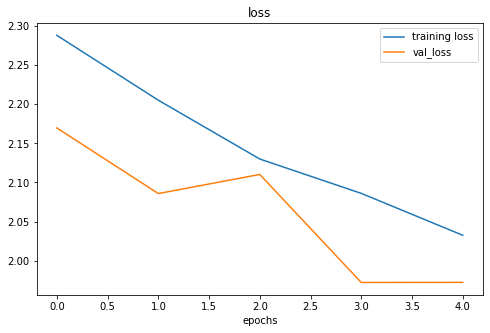

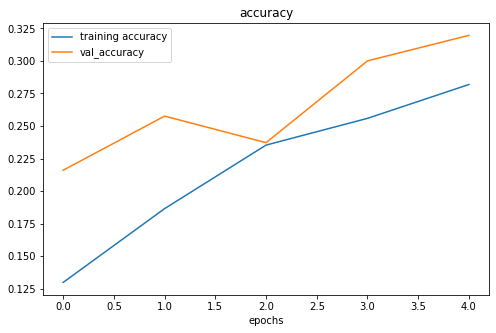

In [ ]:
# Check out our model's performance with augmented data
plot_loss_curve(history_10)



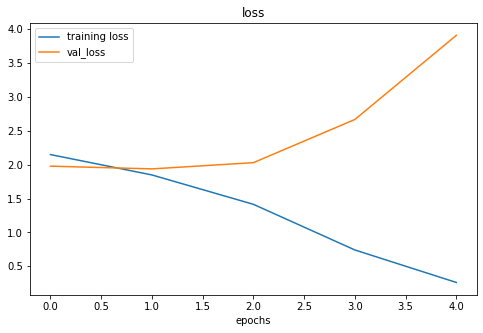

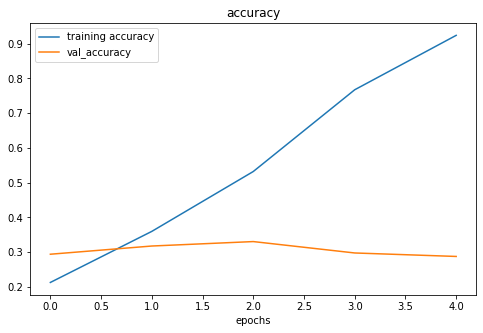

In [ ]:
# Check out our model's performance without augmented data
plot_loss_curve(history_8)


##**7. Repeat until satisfied**
we could keep going  here.....continuing trying to bring our loss curves closer together and trying to improve the validation/test accuracy.

**How?**

**By running lots of experiments namely.**
 * reconstructing our model's architecture(increase layers/hidden units)
 * adjusting the learnng rate.
 * try different data augmentation(adjust the hyperparameter in our InageDataGenerator instance).
 * training for longer(eg:10 epochs instead of 5 epochs.
 * **So,let's try transfer learning.**


##**Making a prediction with our trained model**

In [ ]:
# What classes has our model been trained on?
class_names



array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
# Download some custom images
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg



In [ ]:
# Make a prediction using model_10
pred_and_plot(model=model_10, 
              filename="03-steak.jpeg", 
              class_names=class_names)



In [ ]:
pred_and_plot(model_7, "03-sushi.jpeg", class_names)

In [ ]:
class_names

##**Saving and Loading model**

In [ ]:
model_10.save("saved_trained_model_10")

In [ ]:
model_7.save("saved_trained_model_7")
